<b id="Top"> </b>  

1. [Relevant libraries](#1)
2. [dtypes & info](#2)
3. [Noisy data](#3)
4. [conditional selection](#4)


---

#### Information on the data
The target of our project is ... <br>taken from [Kaggle](https://www.kaggle.com/datasets/sazidthe1/nobel-prize-data)

In [102]:
#!pip install geopandas
#!pip install folium
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import requests
from IPython.display import Image


In [103]:
url = 'https://raw.githubusercontent.com/SarahB21/Project2024/main/nobel_laureates_data.csv'
nobel_data = pd.read_csv(url)
nobel_data.head()

,year,category,motivation,prizeShare,laureateID,fullName,gender,born,bornCountry,bornCity,died,diedCountry,diedCity,organizationName,organizationCountry,organizationCity
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,17-01-1955,Hungary,Szolnok,0000-00-00,NaN,NaN,Szeged University,Hungary,Szeged
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,1946-00-00,USA,New York NY,0000-00-00,NaN,NaN,Harvard University,USA,Cambridge MA
2,2023,peace,for her fight against the oppression of women ...,1,1033,Narges Mohammadi,female,21-04-1972,Iran,Zanjan,0000-00-00,NaN,NaN,NaN,NaN,NaN
3,2023,literature,for his innovative plays and prose which give ...,1,1032,Jon Fosse,male,29-09-1959,Norway,Haugesund,0000-00-00,NaN,NaN,NaN,NaN,NaN
4,2023,chemistry,for the discovery and synthesis of quantum dots,3,1031,Alexei Ekimov,male,1945-00-00,Russia,NaN,0000-00-00,NaN,NaN,Nanocrystals Technology Inc.,USA,New York NY


In [104]:
url = 'https://raw.githubusercontent.com/SarahB21/Project2024/main/nobel_laureates_data.csv'
nobel_data = pd.read_csv(url)
nobel_data.shape

(1000, 16)

In [105]:
nobel_data.columns

Index(['year', 'category', 'motivation', 'prizeShare', 'laureateID',
       'fullName', 'gender', 'born', 'bornCountry', 'bornCity', 'died',
       'diedCountry', 'diedCity', 'organizationName', 'organizationCountry',
       'organizationCity'],
      dtype='object')

In [106]:
category_unique = nobel_data['category'].unique()
print(category_unique)


['medicine' 'economics' 'peace' 'literature' 'chemistry' 'physics']


In [107]:
gender_unique = nobel_data['gender'].unique()
print(gender_unique)


['female' 'male' 'org']


In [108]:
nobel_data.drop_duplicates(subset=['year', 'category', 'motivation', 'prizeShare', 'laureateID',
       'fullName', 'gender', 'born', 'bornCountry', 'bornCity', 'died',
       'diedCountry', 'diedCity', 'organizationName', 'organizationCountry',
       'organizationCity'], inplace=True)
nobel_data.shape

(1000, 16)

In [109]:
nobel_data.rename(columns=lambda x: x.capitalize(), inplace=True)


In [110]:
nobel_data.head(2)

,Year,Category,Motivation,Prizeshare,Laureateid,Fullname,Gender,Born,Borncountry,Borncity,Died,Diedcountry,Diedcity,Organizationname,Organizationcountry,Organizationcity
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,17-01-1955,Hungary,Szolnok,0000-00-00,NaN,NaN,Szeged University,Hungary,Szeged
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,1946-00-00,USA,New York NY,0000-00-00,NaN,NaN,Harvard University,USA,Cambridge MA


### 1. Wrangling data

In [111]:
nobel_data.columns

Index(['Year', 'Category', 'Motivation', 'Prizeshare', 'Laureateid',
       'Fullname', 'Gender', 'Born', 'Borncountry', 'Borncity', 'Died',
       'Diedcountry', 'Diedcity', 'Organizationname', 'Organizationcountry',
       'Organizationcity'],
      dtype='object')

In [112]:
nobel_data.isnull().sum()

Year                     0
Category                 0
Motivation               0
Prizeshare               0
Laureateid               0
Fullname                 0
Gender                   0
Born                     0
Borncountry             30
Borncity                34
Died                    30
Diedcountry            348
Diedcity               354
Organizationname       264
Organizationcountry    267
Organizationcity       269
dtype: int64

In [113]:
nobel_data['Gender'] = nobel_data['Gender'].replace('org', 'UNREPORTED')
nobel_data['Died'].fillna('UNREPORTED', inplace=True)
nobel_data['Borncountry'].fillna('UNREPORTED', inplace=True)
nobel_data['Borncity'].fillna('UNREPORTED', inplace=True)
nobel_data['Diedcountry'].fillna('UNREPORTED', inplace=True)
nobel_data['Diedcity'].fillna('UNREPORTED', inplace=True)
nobel_data['Organizationname'].fillna('UNREPORTED', inplace=True)
nobel_data['Organizationcountry'].fillna('UNREPORTED', inplace=True)
nobel_data['Organizationcity'].fillna('UNREPORTED', inplace=True)
 
nobel_data.dtypes

Year                    int64
Category               object
Motivation             object
Prizeshare              int64
Laureateid              int64
Fullname               object
Gender                 object
Born                   object
Borncountry            object
Borncity               object
Died                   object
Diedcountry            object
Diedcity               object
Organizationname       object
Organizationcountry    object
Organizationcity       object
dtype: object

In [114]:
gender_new = nobel_data['Gender'].unique()
print(gender_new)

['female' 'male' 'UNREPORTED']


# Noisy data
#### Checking that these variables are within a reasonable range with Boxplot

######Boxplots to do

### Display nobel countries on a map with naturalearth_lowres

In [115]:
nobel_data.columns

Index(['Year', 'Category', 'Motivation', 'Prizeshare', 'Laureateid',
       'Fullname', 'Gender', 'Born', 'Borncountry', 'Borncity', 'Died',
       'Diedcountry', 'Diedcity', 'Organizationname', 'Organizationcountry',
       'Organizationcity'],
      dtype='object')

In [116]:
world = gpd.read_file('/Users/sarahbonnan/Desktop/ne_110m_admin_0_countries.zip')

In [117]:
world.head(3)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [118]:
# Join between the two DataFrames
merged_data = pd.merge(left=nobel_data, right=world, left_on='Borncountry', right_on='ADMIN', how='left')

# Select entries without a match in 'Borncountry'.
missing_borncountry = merged_data[merged_data['Borncountry'].isnull()]
missing_borncountry_names = missing_borncountry['ADMIN'].unique()

# Select entries without a match in 'ADMIN'.
missing_admin = merged_data[merged_data['ADMIN'].isnull()]
missing_admin_names = missing_admin['Borncountry'].unique()

# # Display the names of the countries without a match.
print("Countries in 'ADMIN' of World without a match in 'Borncountry' de nobel_data:")
print(missing_borncountry_names)

print("\nCountries in'Borncountry' of nobel_data without a match in 'ADMIN' of World:")
print(missing_admin_names)


Countries in 'ADMIN' of World without a match in 'Borncountry' de nobel_data:
[]

Countries in'Borncountry' of nobel_data without a match in 'ADMIN' of World:
['USA' 'UNREPORTED' 'the Netherlands' 'Tanzania' 'Scotland'
 'Czech Republic' 'Northern Ireland' 'Saint Lucia' 'Turkiye'
 'Guadeloupe Island' 'Faroe Islands (Denmark)']


In [123]:
remplacements = {'USA':'United States of America','the Netherlands':'Netherlands','Tanzania':'United Republic of Tanzania','Scotland':'United Kingdom','Northern Ireland':'Saint Lucia',
                'Czech Republic':'Czechia','Turkiye':'Turkey','Guadeloupe Island':'France','Faroe Islands (Denmark)':'Denmark'}

# Perform replacement in the 'Borncountry' column of the 'nobel_data' DataFrame."
nobel_data['Borncountry'].replace(remplacements, inplace=True)


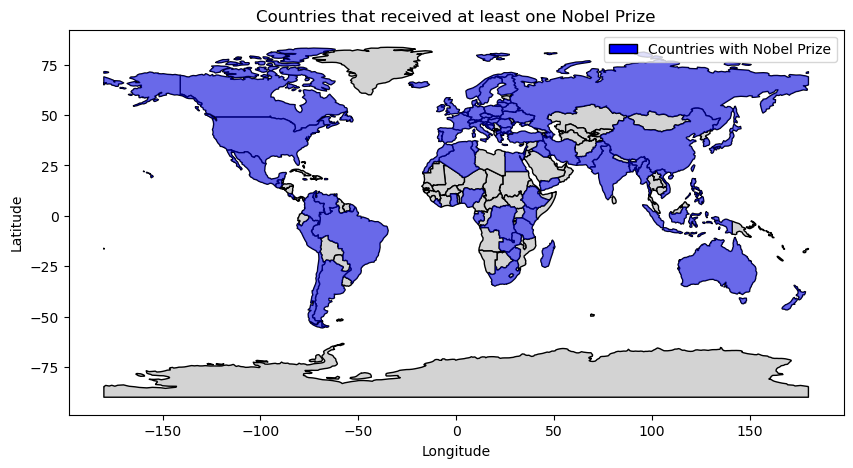

In [132]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.patches import Patch

# Get the list of countries from the 'Borncountry' column.
born_countries = nobel_data['Borncountry'].unique()

# Get the list of countries from the "Diedcountry" column.
died_countries = nobel_data['Diedcountry'].unique()

nobel_countries = set(born_countries) | set(died_countries)

# Load the geospatial data of countries from Natural Earth Data.
world = gpd.read_file('/Users/sarahbonnan/Desktop/ne_110m_admin_0_countries.zip')

# Merge the Nobel Prize data with the geospatial data of countries.
nobel_world = world[world['ADMIN'].isin(nobel_countries)]

# Display the map
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Display the countries that have received at least one Nobel Prize.
nobel_world.plot(ax=ax, color='blue', alpha=0.5)

# Create a custom legend for countries with Nobel Prize
legend_elements = [Patch(facecolor='blue', edgecolor='black', label='Countries with Nobel Prize')]
ax.legend(handles=legend_elements)

plt.title('Countries that received at least one Nobel Prize')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [133]:
len(nobel_world)

85

### Analysis of ...

#### We can check if there are countries that are particularly talented in a category and win a lot of Nobel Prizes in that same category.

In [134]:
#This kind of diagramme is not suitable to this kind of data. Need to find something else.  

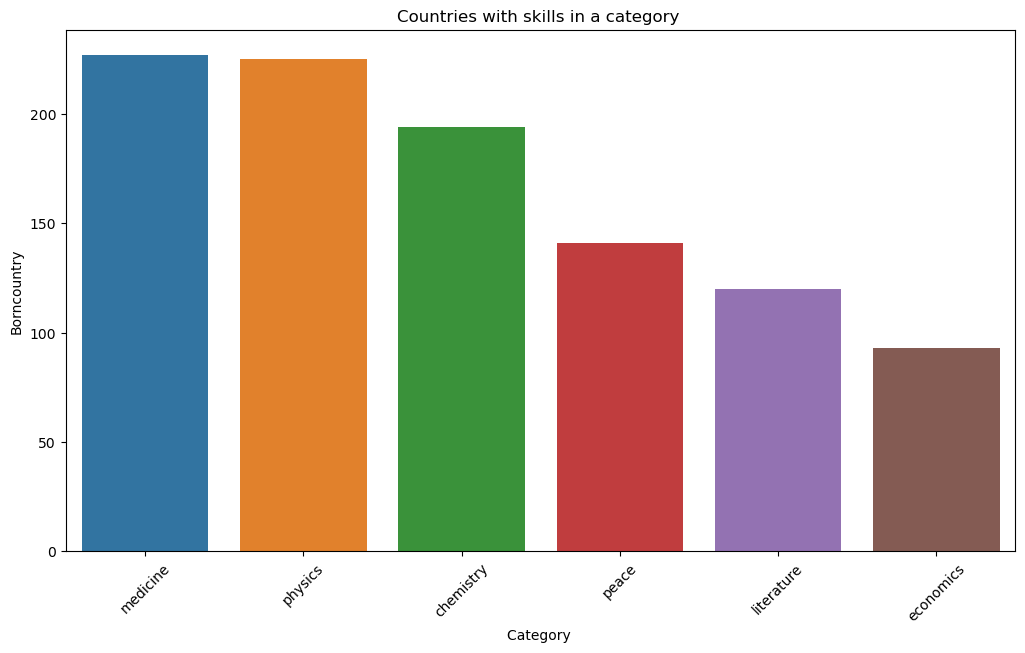

In [135]:
plt.figure(figsize=(20, 12))


plt.subplot(221)  
sns.countplot(x='Category', data=nobel_data, order=nobel_data['Category'].value_counts().index)
plt.title('Countries with skills in a category ')
plt.xlabel('Category ')
plt.ylabel('Borncountry')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

#### We can compare by gender with percentage. 

In [136]:
#Need to fix the Y. Only %  

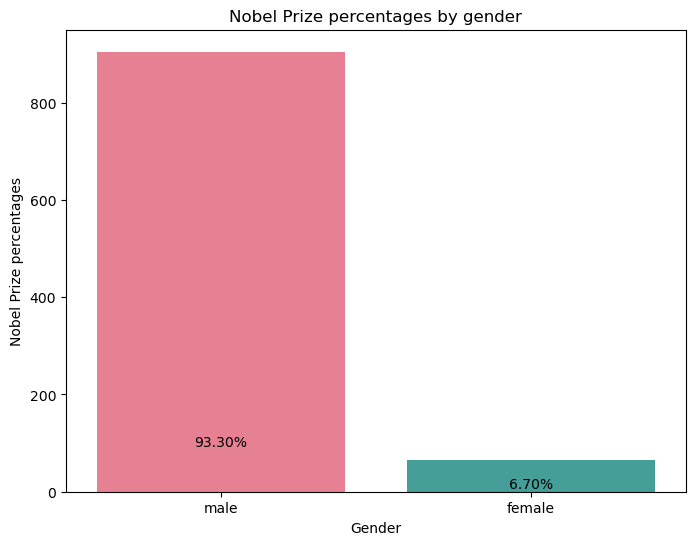

In [138]:
#Filter the DataFrame to exclude gender values that are 'UNREPORTED'
nobel_data_filtered = nobel_data[nobel_data['Gender'] != 'UNREPORTED']

# Calculate Nobel Prize percentages by gender
total_counts = nobel_data_filtered['Gender'].value_counts()
percentages = total_counts / total_counts.sum() * 100

# Create a countplot to compare the percentage of Nobel Prize winners by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=nobel_data_filtered, palette='husl', order=percentages.index)

# Add percentages above each bar
for i, p in enumerate(percentages):
    plt.text(i, p + 0.5, f'{p:.2f}%', ha='center')

# Add titles and labels
plt.title('Nobel Prize percentages by gender')
plt.xlabel('Gender')
plt.ylabel('Nobel Prize percentages')

# Afficher le graphique
plt.show()


In [900]:
#Repeat the same thing after the years where universal suffrage was applied (right to vote for women) in the majority of countries around the world.
#Review data from the 1980s. from 2000s. 

Pour visualiser le lien entre l'évolution temporelle des prix Nobel et des événements historiques mondiaux, vous pouvez utiliser un graphique linéaire superposé avec des marqueurs pour marquer les événements historiques. Voici comment vous pouvez procéder :

Préparez vos données en regroupant les prix Nobel par année et en identifiant les événements historiques importants pour chaque année.
Tracez un graphique linéaire pour montrer l'évolution temporelle des prix Nobel au fil des ans.
Ajoutez des marqueurs pour les événements historiques sur le graphique pour mettre en évidence les relations potentielles.
Voici un exemple de code pour réaliser cela 